Archivo CSV cargado correctamente.
Primeras filas del DataFrame:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Datos seleccionados (Ingresos Anuales e Índice de Gastos):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]

Generando el dendrograma...

--- Observación del Dendrograma ---
Observa el dendrograma que se mostrará a continuación.
Para determinar el número óptimo de clústeres (k), busca la distancia vertical más larga
que no cruce ninguna línea horizontal de fusión extendida.
Traza una línea horizontal imaginaria a esa altura.
El número de líneas verticales que cruza esta línea horizontal es el número óptimo

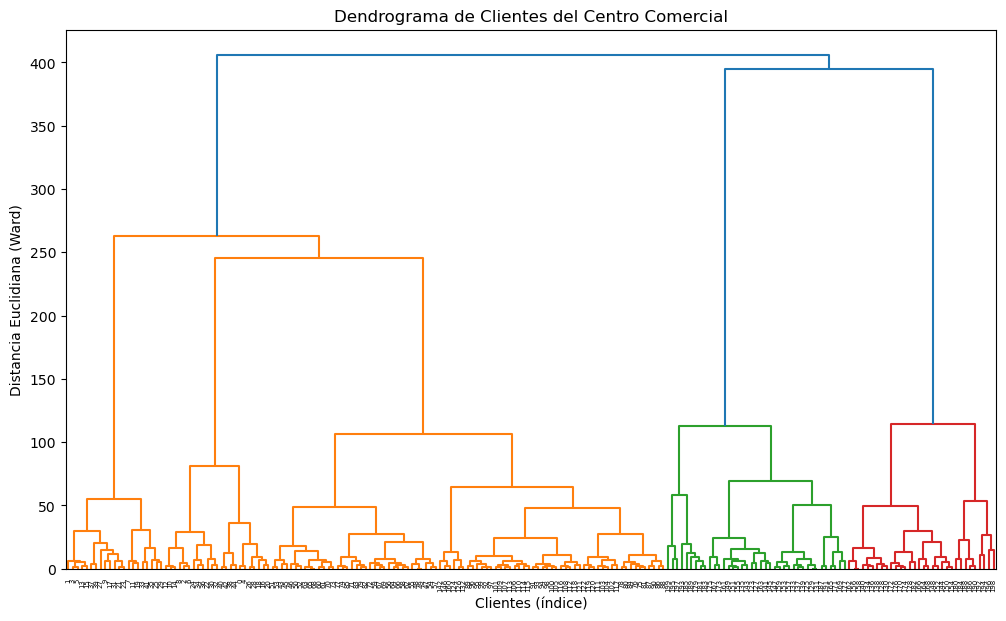


Se utilizarán 5 clústeres para el agrupamiento.

Asignación de clústeres para los primeros clientes:
[4 3 4 3 4 3 4 3 4 3]

DataFrame con la columna de clúster añadida:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_HC  
0           4  
1           3  
2           4  
3           3  
4           4  

Generando el diagrama de dispersión de los clústeres...


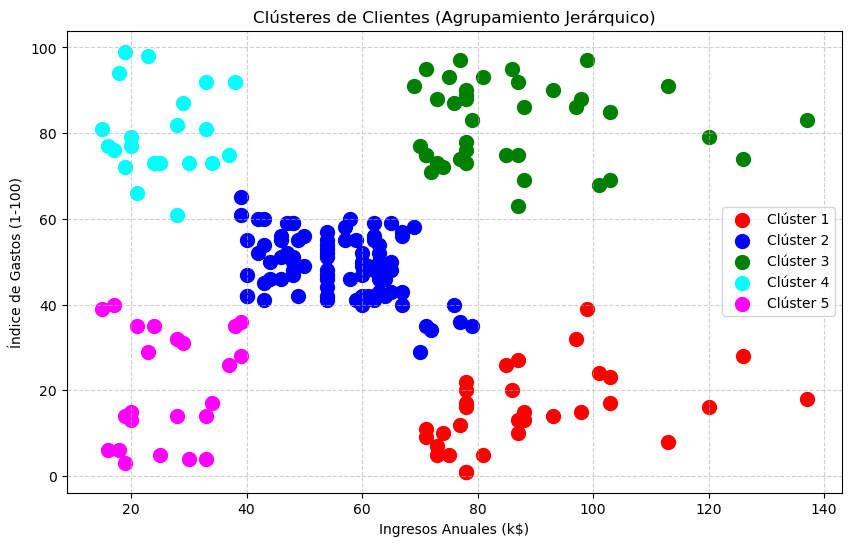


Análisis completado.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#1: Cargar los datos y seleccionar columnas
df = pd.read_csv('Mall_Customers.csv')
print("Archivo CSV cargado correctamente.")
print("Primeras filas del DataFrame:")
print(df.head())

# Seleccionar unicamente las columnas de ingresos anuales e indice de gastos
# Usaremos iloc para seleccionar por posicion de columna (indices 3 y 4)
# o puedes usar los nombres de las columnas si prefieres: ['Annual Income (k$)', 'Spending Score (1-100)']
X = df.iloc[:, [3, 4]].values

print("\nDatos seleccionados (Ingresos Anuales e indice de Gastos):")
print(X[:5]) # Mostrar las primeras 5 filas de los datos seleccionados

#2: Generar el dendrograma
print("\nGenerando el dendrograma...")
# Calcular el linkage usando el metodo Ward, que minimiza la varianza dentro de cada cluster
# La metrica por defecto es 'euclidean', que es la que se pide
linked = sch.linkage(X, method='ward')

# Crear la figura y los ejes para el dendrograma
plt.figure(figsize=(12, 7))

# Generar y mostrar el dendrograma
dendrogram = sch.dendrogram(linked)

# Añadir titulo y etiquetas
plt.title('Dendrograma de Clientes del Centro Comercial')
plt.xlabel('Clientes (indice)')
plt.ylabel('Distancia Euclidiana (Ward)')

#3: Determinar el numero optimo de clusteres (observando el dendrograma)
# Instruccion para el usuario:
print("\n--- Observacion del Dendrograma ---")
print("Observa el dendrograma que se mostrara a continuacion.")
print("Para determinar el número optimo de clusteres (k), busca la distancia vertical mas larga")
print("que no cruce ninguna linea horizontal de fusion extendida.")
print("Traza una linea horizontal imaginaria a esa altura.")
print("El numero de lineas verticales que cruza esta linea horizontal es el numero optimo de clusteres.")
print("Basado en analisis comunes de este dataset, k=5 suele ser una buena eleccion.")
print("------------------------------------")

# Mostrar el dendrograma
plt.show()

#Realizar el Agrupamiento Jerarquico Aglomerativo

# Decidir el numero de clusteres basado en la inspeccion del dendrograma
# (Para este ejemplo, usaremos k=5, que es un resultado comun para este dataset)
n_clusters_optimo = 5
print(f"\nSe utilizarán {n_clusters_optimo} clústeres para el agrupamiento.")

# Crear una instancia del modelo AgglomerativeClustering
# affinity='euclidean': Usa la distancia euclidiana (por defecto si linkage='ward')
# linkage='ward': Usa el criterio de Ward para las fusiones
hc = AgglomerativeClustering(n_clusters=n_clusters_optimo, metric='euclidean', linkage='ward')

#5: Asignar clientes a clusteres

# Ajustar el modelo a los datos y predecir los clusteres para cada cliente
y_hc = hc.fit_predict(X)

print("\nAsignacion de clústeres para los primeros clientes:")
print(y_hc[:10]) # Mostrar las asignaciones de los primeros 10 clientes

# Añadir las asignaciones de cluster al DataFrame original (opcional, para analisis)
df['Cluster_HC'] = y_hc
print("\nDataFrame con la columna de cluster añadida:")
print(df.head())

#Visualizar los clusteres

print("\nGenerando el diagrama de dispersión de los clusteres...")
plt.figure(figsize=(10, 6))

# Definir colores para cada cluster
colores = ['red', 'blue', 'green', 'cyan', 'magenta']
etiquetas_cluster = [f'Clúster {i+1}' for i in range(n_clusters_optimo)]

# Dibujar los puntos para cada cluster con un color diferente
for i in range(n_clusters_optimo):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=100, c=colores[i], label=etiquetas_cluster[i])

# Añadir titulo y etiquetas a los ejes
plt.title('Clusteres de Clientes (Agrupamiento Jerarquico)')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Índice de Gastos (1-100)')

# Mostrar la leyenda
plt.legend()

# Mostrar el grafico de dispersion
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nAnalisis completado.")